In [1]:
import os
import sys
from glob import glob
from tqdm import tqdm
import numpy as np
import pickle
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
with open("../saved/RemoteFoldSet_domain_to_seqs.pkl", "rb") as f:
    domain_to_seqs = pickle.load(f)

In [4]:
def compute_diversity(sampled_seqs):
    diversity = []
    for a in range(len(sampled_seqs)):
        for b in range(a + 1, len(sampled_seqs)):
            seq1 = sampled_seqs[a]
            seq2 = sampled_seqs[b]
            different = 0
            identical = 0
            for i in range(len(seq1)):
                aa = seq1[i]
                if aa != 'X':
                    if seq1[i] == seq2[i]:
                        identical += 1
                    else:
                        different += 1
            diversity.append(different / (identical + different))
    diversity = np.mean(diversity)
    return diversity

In [5]:
domain_diversity_len = {}
for domain, sampled_seqs in domain_to_seqs.items():
    diversity = compute_diversity(list(sampled_seqs))
    length = len(sampled_seqs[0])
    domain_diversity_len[domain] = (diversity, length)

In [6]:
# mean and std of domain_diversity
mean_diversity = np.mean([d for d, l in domain_diversity_len.values()])
std_diversity = np.std([d for d, l in domain_diversity_len.values()])
print(f"Mean Diversity: {mean_diversity:.4f}, Std Diversity: {std_diversity:.4f}")

# mean and std of domain_length
mean_length = np.mean([l for d, l in domain_diversity_len.values()])
std_length = np.std([l for d, l in domain_diversity_len.values()])
print(f"Mean Length: {mean_length:.4f}, Std Length: {std_length:.4f}")

Mean Diversity: 0.7391, Std Diversity: 0.0323
Mean Length: 235.0444, Std Length: 117.6132


/tmp/ipykernel_1408396/3243071745.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  orig_cmap = cm.get_cmap('coolwarm')


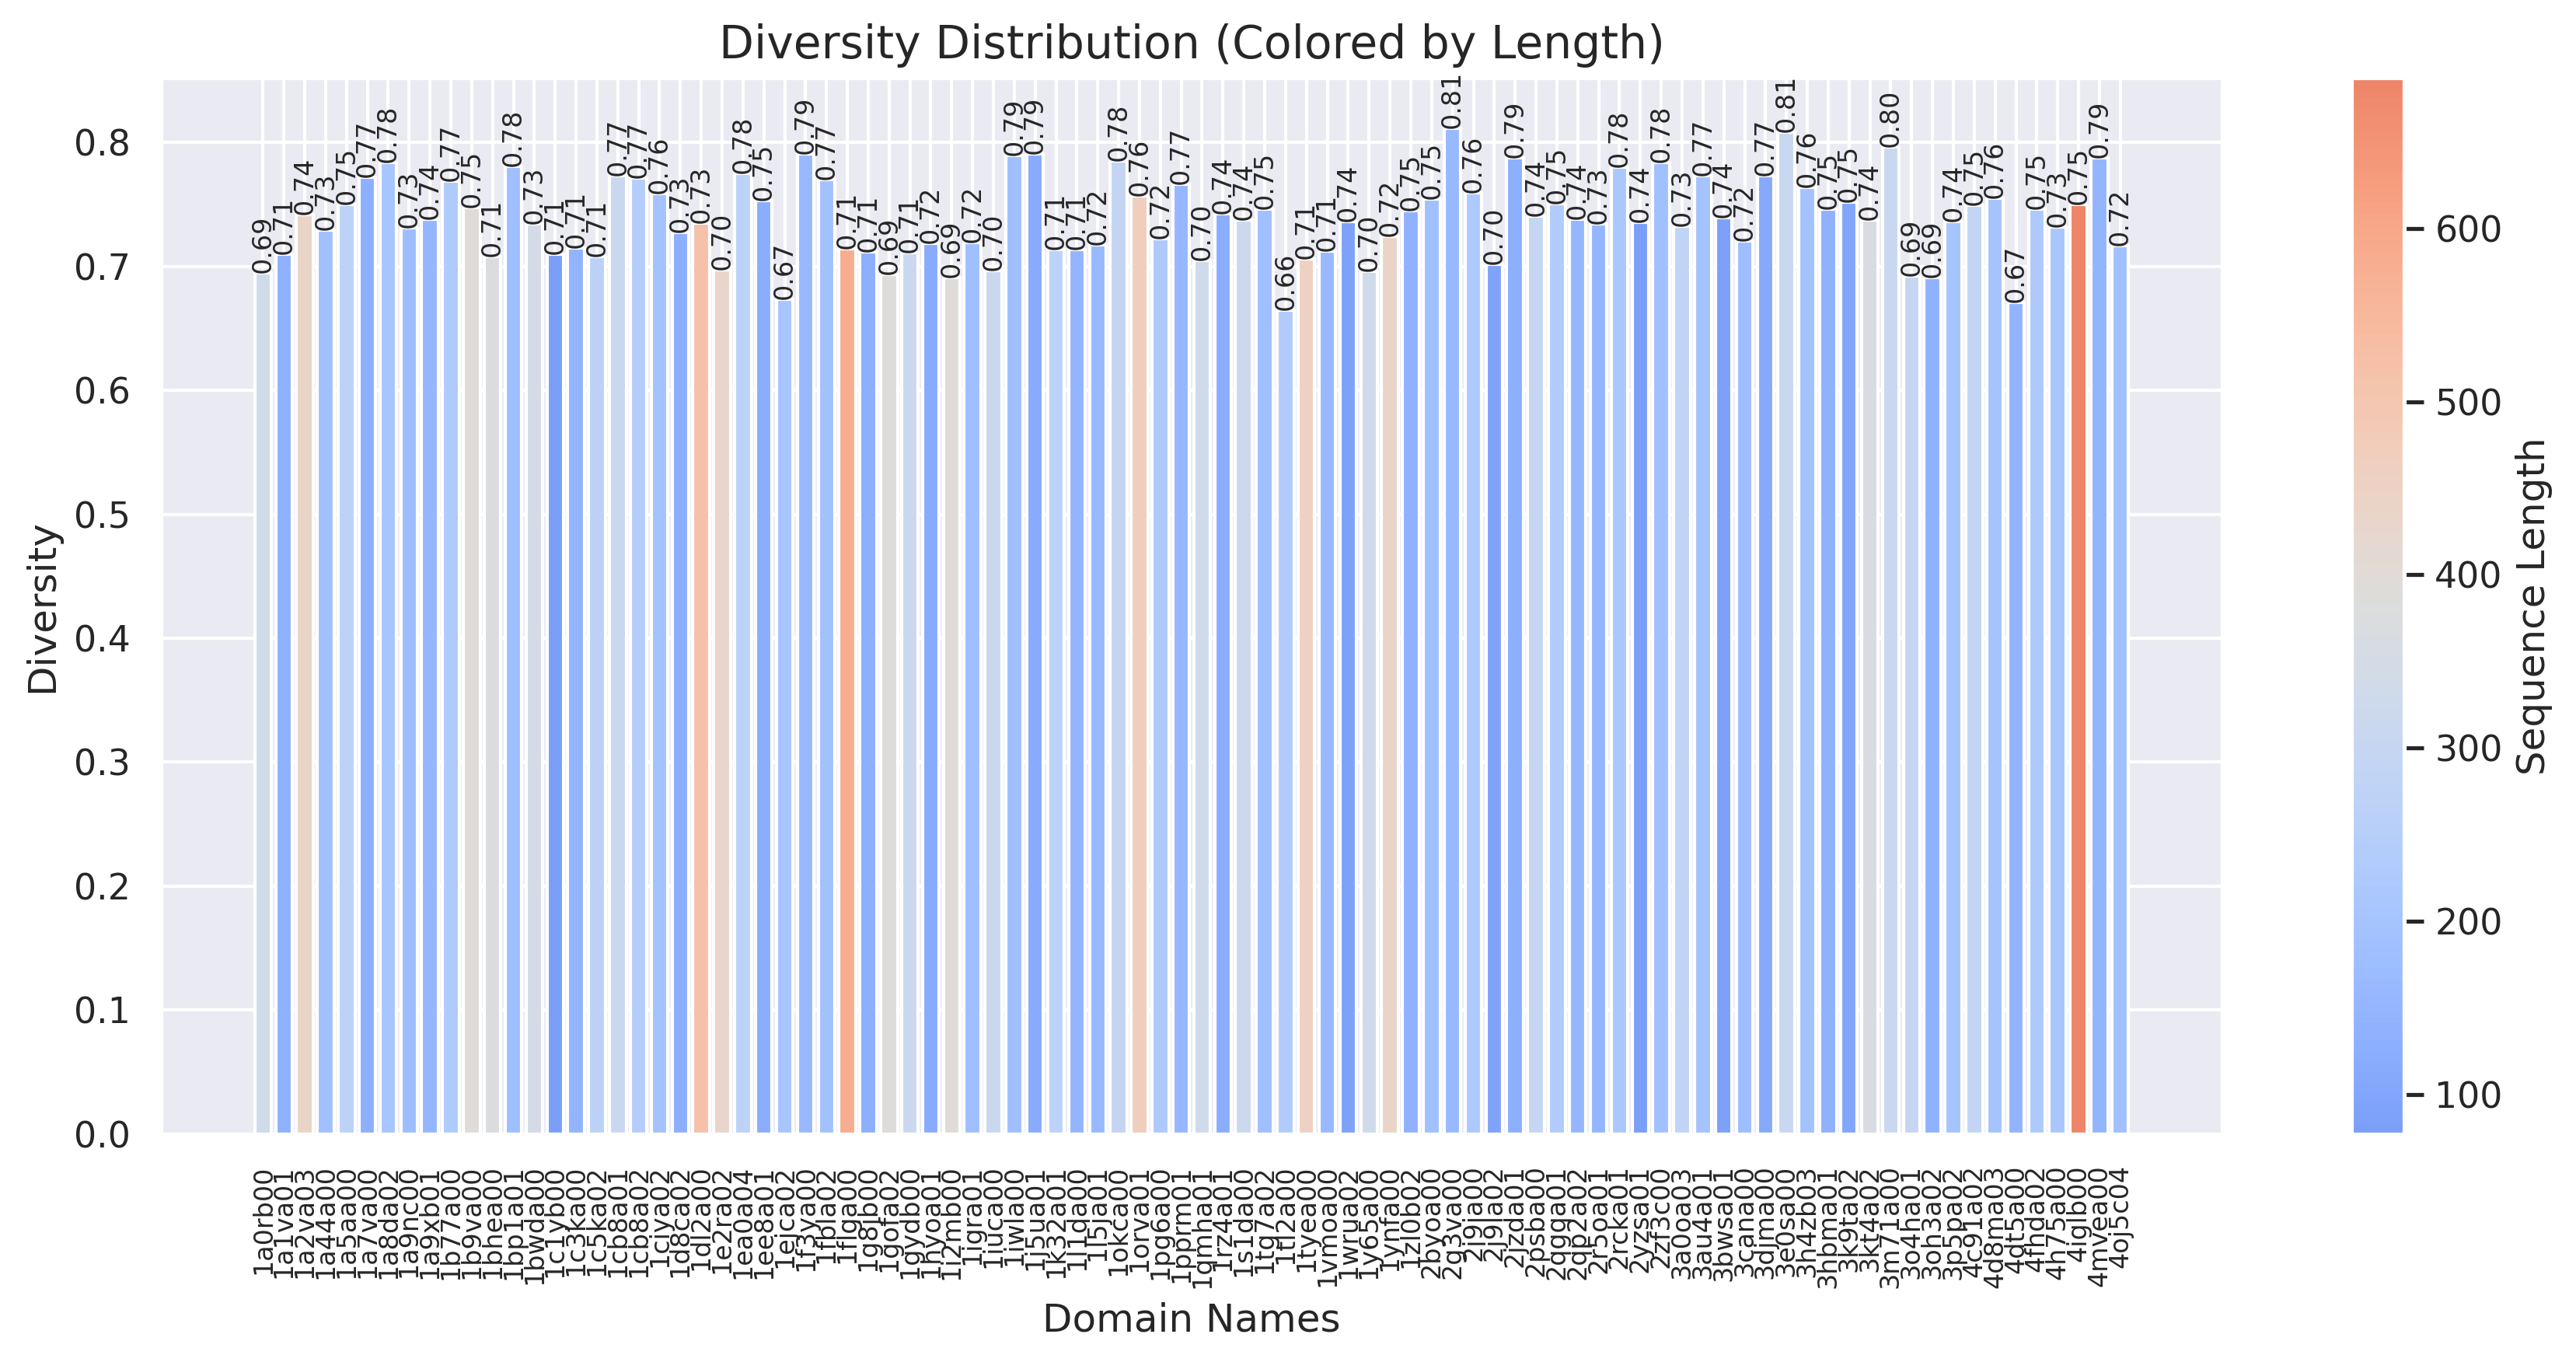

In [7]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize, LinearSegmentedColormap

sns.set(style="darkgrid")

# Sort and unpack domain names and values
sorted_items = sorted(domain_diversity_len.items(), key=lambda x: x[0])
names, values = zip(*sorted_items)
diversities, lengths = zip(*values)

# Normalize length values (for color mapping)
norm = mcolors.Normalize(vmin=min(lengths), vmax=max(lengths))
orig_cmap = cm.get_cmap('coolwarm')
truncated_cmap = LinearSegmentedColormap.from_list(
    'truncated_pink',
    orig_cmap(np.linspace(0.2, 0.8, 256))
)

# Map length values to colors
colors = [truncated_cmap(norm(l)) for l in lengths]

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

# Create bar plot (height = diversity, color = length)
bars = ax.bar(names, diversities, color=colors)

# Annotate bars with diversity values
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f"{height:.2f}", ha='center', va='bottom',
            rotation=90, fontsize=8)

# Set axis labels and title
ax.set_xlabel('Domain Names', fontsize=12)
ax.set_ylabel('Diversity', fontsize=12)
ax.set_title('Diversity Distribution (Colored by Length)', fontsize=14)
ax.tick_params(axis='x', rotation=90, labelsize=8)

# Add colorbar for length
sm = cm.ScalarMappable(cmap=truncated_cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Sequence Length', fontsize=12)

# Adjust layout and show plot
fig.tight_layout()
plt.show()
